<a href="https://colab.research.google.com/github/Uttamkumar-hub/greenhousegasemmison/blob/main/greenhousegasemmison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [2]:
#  1. Load the dataset
file_path = "/content/drive/MyDrive/SupplyChainEmissionFactorsforUSIndustriesCommodities2.xlsx"
sheet_name = "2016_Summary_Industry"
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [7]:
# Step 2: Clean the column names (strip extra whitespace and hidden characters)
df.columns = df.columns.str.strip().str.replace('\u200b', '', regex=False)


In [8]:
# Step 3: Rename useful columns for clarity
df.rename(columns={
    'Industry Name': 'Industry',
    'Supply Chain Emission Factors with Margins': 'Total Emissions'
}, inplace=True)

In [9]:
# Step 4: Remove rows with null values in 'Total Emissions'
df_cleaned = df.dropna(subset=['Total Emissions'])

In [10]:
# Step 5: Remove duplicates (if any)
df_cleaned = df_cleaned.drop_duplicates()

# Step 6: Convert 'Total Emissions' to numeric (if needed)
df_cleaned['Total Emissions'] = pd.to_numeric(df_cleaned['Total Emissions'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['Total Emissions'])

In [11]:
# --- Visualizations ---

# Bar Chart: Top 10 industries by emissions
top_10 = df_cleaned.sort_values(by='Total Emissions', ascending=False).head(10)


/tmp/ipython-input-12-1867977716.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='Total Emissions', y='Industry', palette='mako')


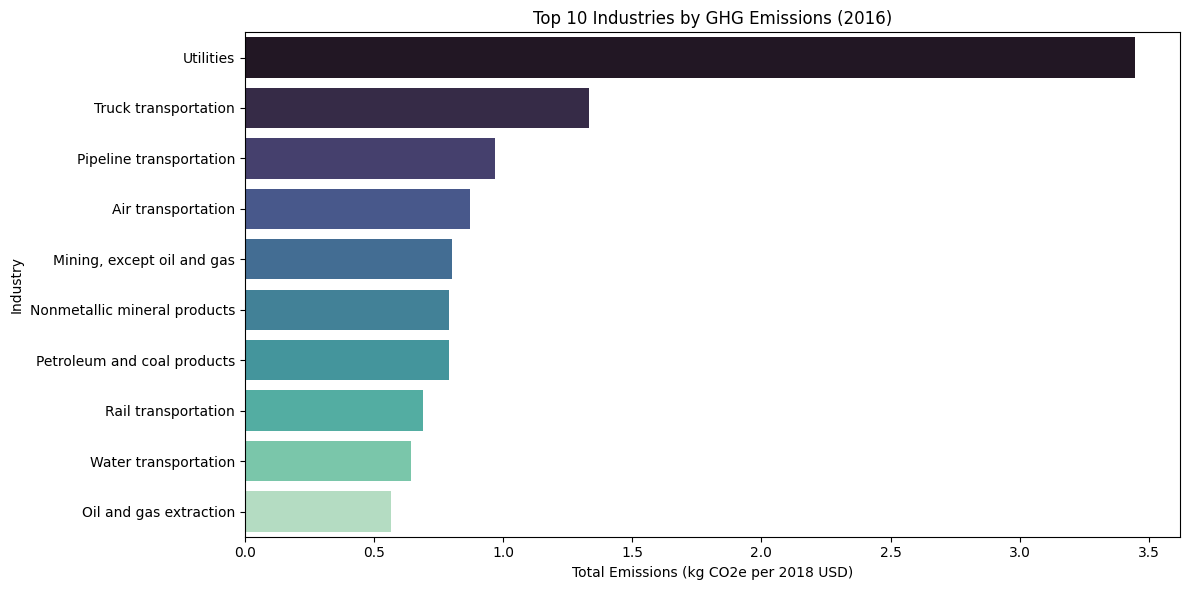

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x='Total Emissions', y='Industry', palette='mako')
plt.title('Top 10 Industries by GHG Emissions (2016)')
plt.xlabel('Total Emissions (kg CO2e per 2018 USD)')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

In [25]:
#week 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

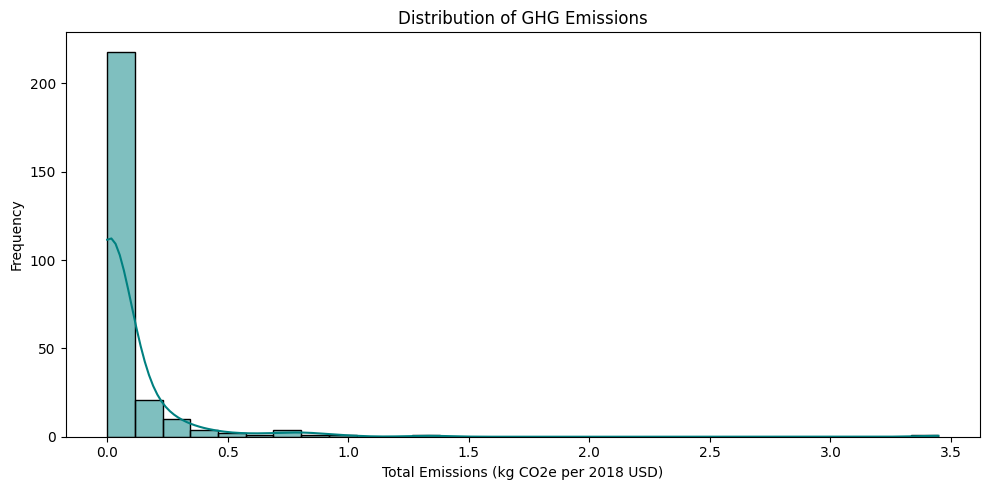

In [24]:
# Histogram: Emission distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['Total Emissions'], bins=30, kde=True, color='teal')
plt.title('Distribution of GHG Emissions')
plt.xlabel('Total Emissions (kg CO2e per 2018 USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [26]:
# Clean the data
target_col = "Supply Chain Emission Factors without Margins"
df_cleaned = df.dropna(subset=[target_col])
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.str.contains('^Unnamed')]
df_cleaned = df_cleaned.drop_duplicates()


In [27]:
print(df.columns.tolist())



['Industry Code', 'Industry', 'Substance', 'Unit', 'Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors', 'Total Emissions', 'Unnamed: 7', 'DQ ReliabilityScore of Factors without Margins', 'DQ TemporalCorrelation of Factors without Margins', 'DQ GeographicalCorrelation of Factors without Margins', 'DQ TechnologicalCorrelation of Factors without Margins', 'DQ DataCollection of Factors without Margins']


In [28]:
#   Prepare features and target
# We'll drop non-numeric columns and the target
X = df_cleaned.select_dtypes(include=[np.number]).drop(columns=[target_col])
y = df_cleaned[target_col]

In [29]:
#   Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#   Train models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)

lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

#  Define evaluation function
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"----- {name} -----")
    print(f"MAE:  {mean_absolute_error(y_test, y_pred):.4f}")
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Compatible RMSE
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2_score(y_test, y_pred):.4f}")
    print()

#  Evaluate all models
evaluate_model("Linear Regression", lr_model, X_test, y_test)
evaluate_model("Decision Tree", dt_model, X_test, y_test)
evaluate_model("Random Forest", rf_model, X_test, y_test)


----- Linear Regression -----
MAE:  0.0000
RMSE: 0.0001
R²:   1.0000

----- Decision Tree -----
MAE:  0.0040
RMSE: 0.0152
R²:   0.9887

----- Random Forest -----
MAE:  0.0057
RMSE: 0.0241
R²:   0.9718



In [32]:
# Hyperparameter tuning with GridSearchCV (Random Forest)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Parameters for Random Forest:", grid_search.best_params_)

Best Parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 150}


----- Best Random Forest (Tuned) -----
MAE:  0.0059
RMSE: 0.0238
R²:   0.9724



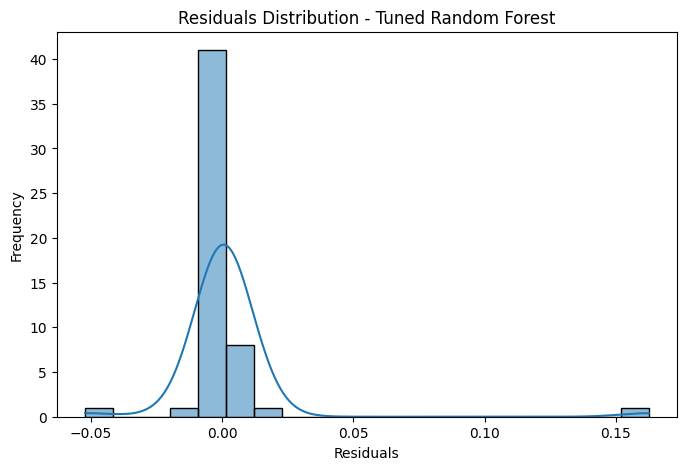

In [33]:
#  Evaluate the best model
evaluate_model("Best Random Forest (Tuned)", best_rf, X_test, y_test)

#  Visualizations
y_pred_rf = best_rf.predict(X_test)
residuals = y_test - y_pred_rf

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=20)
plt.title("Residuals Distribution - Tuned Random Forest")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


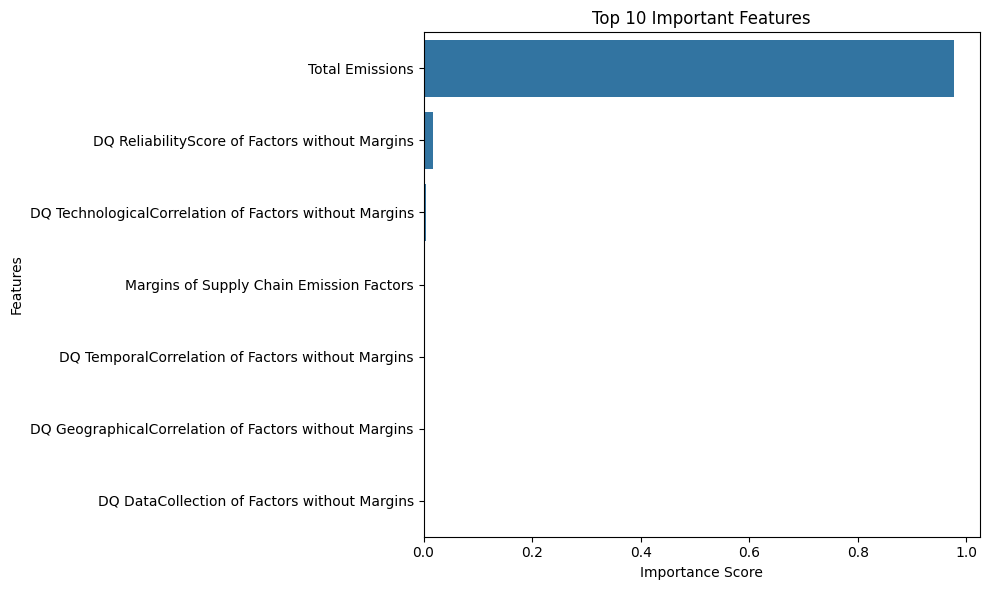

In [34]:
# Feature importance
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values[:10], y=top_features.index[:10])
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [35]:
#  Save the best model
joblib.dump(best_rf, "best_rf_model.joblib")
print("✅ Best model saved as 'best_rf_model.joblib'")

✅ Best model saved as 'best_rf_model.joblib'



📊 Model Performance Comparison:
                 Model       MAE      RMSE        R²
0    Linear Regression  0.000035  0.000132  0.999999
1        Decision Tree  0.003981  0.015235  0.988713
2        Random Forest  0.005746  0.024097  0.971761
3  Tuned Random Forest  0.005933  0.023822  0.972402


/tmp/ipython-input-36-3017714634.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x='Model', y='MAE', palette='Blues_r')
/tmp/ipython-input-36-3017714634.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x='Model', y='RMSE', palette='Greens_r')
/tmp/ipython-input-36-3017714634.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x='Model', y='R²', palette='Purples_r')


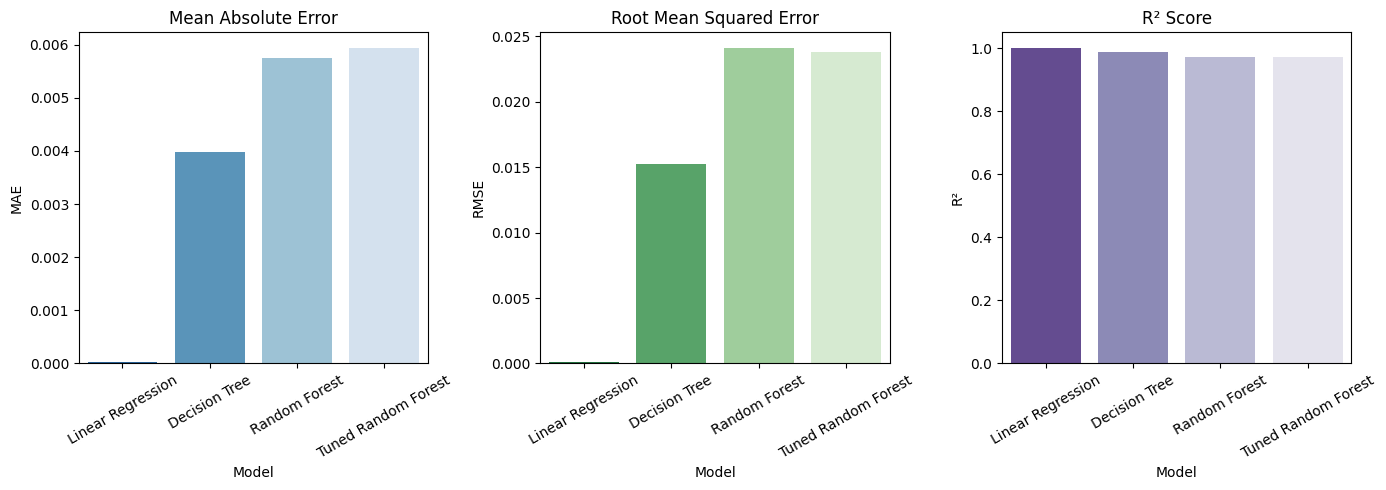

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate and collect metrics for each model
metrics = {
    'Model': [],
    'MAE': [],
    'RMSE': [],
    'R²': []
}

# Reuse models if not in memory: re-train them (optional)
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics['Model'].append(name)
    metrics['MAE'].append(mean_absolute_error(y_test, y_pred))
    metrics['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred)))
    metrics['R²'].append(r2_score(y_test, y_pred))

# Also include the tuned random forest
y_pred_best = best_rf.predict(X_test)
metrics['Model'].append("Tuned Random Forest")
metrics['MAE'].append(mean_absolute_error(y_test, y_pred_best))
metrics['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred_best)))
metrics['R²'].append(r2_score(y_test, y_pred_best))

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)
print("\n📊 Model Performance Comparison:")
print(metrics_df)

# Plot Comparison
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
sns.barplot(data=metrics_df, x='Model', y='MAE', palette='Blues_r')
plt.xticks(rotation=30)
plt.title("Mean Absolute Error")

plt.subplot(1, 3, 2)
sns.barplot(data=metrics_df, x='Model', y='RMSE', palette='Greens_r')
plt.xticks(rotation=30)
plt.title("Root Mean Squared Error")

plt.subplot(1, 3, 3)
sns.barplot(data=metrics_df, x='Model', y='R²', palette='Purples_r')
plt.xticks(rotation=30)
plt.title("R² Score")

plt.tight_layout()
plt.savefig("model_comparison.png")
plt.show()
